# Heart Attack Prediction

This notebook is about predicting whether a patient has a heart attack or not based on selected features.  
The dataset is collected from Kaggle (https://www.kaggle.com/imnikhilanand/heart-attack-prediction).  
Contributor: Chih-Wei(Jerry) Huang  
Date: 11/19/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
# import csv data
df = pd.read_csv('heart_data.csv', na_values='?')  #na_values represent missing value 
display(df.info)
display(df.head())

<bound method DataFrame.info of      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1     29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2     29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3     30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4     31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
289   52    1   4     160.0  331.0  0.0      0.0     94.0    1.0      2.5   
290   54    0   3     130.0  294.0  0.0      1.0    100.0    1.0      0.0   
291   56    1   4     155.0  342.0  1.0      0.0    150.0    1.0      3.0   
292   58    0   2     180.0  393.0  0.0      0.0    110.0    1.0      1.0   
293   65    1   4     130.0  275.0  0.0      1.0    115.0    1.0      1.0   

     slope  ca  thal  num  
0      NaN NaN 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


'num' is the dependent variable, a value of 1 shows the presence of heart disease in the patient, otherwise 0.

In [3]:
# rename target variable 'num' to 'target' & print out the binary result
df = df.rename(columns={'num':'target'})
df['target'].value_counts(dropna=False)

0    188
1    106
Name: target, dtype: int64

In [4]:
#drop the columns with too many missing values
df = df.drop(['slope','ca','thal'], axis=1)
df = df.dropna()  #drop NaN values

In [5]:
display(df.info)
display(df)

<bound method DataFrame.info of      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1     29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
3     30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4     31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   
5     32    0   2     105.0  198.0  0.0      0.0    165.0    0.0      0.0   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
289   52    1   4     160.0  331.0  0.0      0.0     94.0    1.0      2.5   
290   54    0   3     130.0  294.0  0.0      1.0    100.0    1.0      0.0   
291   56    1   4     155.0  342.0  1.0      0.0    150.0    1.0      3.0   
292   58    0   2     180.0  393.0  0.0      0.0    110.0    1.0      1.0   
293   65    1   4     130.0  275.0  0.0      1.0    115.0    1.0      1.0   

     target  
0         0  
1         0  
3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


5 categorical variables: sex, cp, fbs, restecg, and exang, and 5 numerical variables being the rest.

In [6]:
display(df['cp'].value_counts(dropna=False))
display(df['restecg'].value_counts(dropna=False))

4    113
2     92
3     46
1     10
Name: cp, dtype: int64

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

The 2 categorical variables cp & restecg has more than two classes (besides 0 & 1).  
They will be transformed into dummy variables so that they can better fit logistic regression.

In [7]:
df = pd.get_dummies(df, columns=['cp'])
df = pd.get_dummies(df, columns=['restecg'], drop_first=True)  #drop 0 since it's not necessary
display(df)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,1,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,0,1,0,0,0,0


In [8]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['cp_1', 'cp_2', 'cp_3', 'cp_4', 'exang', 'fbs', 'restecg_1.0', 'restecg_2.0', 'sex']


### Split Training and Test Datasets

In [9]:
random_seed = 42 
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])

print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(208, 15)
(53, 15)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


### Scale Numerical Values

In [10]:
# calculate the mean and std for scaling using df_train’s numeric_cols.
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target(df,numeric_cols,cat_cols,scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy() #transforms cat_cols to a numpy array X_categorical.
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target(df_train, numeric_cols, cat_cols, scaler)

### Build Logistic Regression Model

In [11]:
model = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.
model.fit(X, y)

LogisticRegression(penalty='none')

In [12]:
X_test, y_test = get_features_and_target(df_test, numeric_cols, cat_cols, scaler)

### Plot ROC Curve

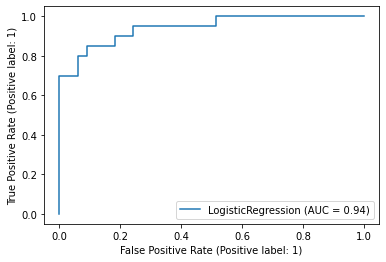

In [13]:
plot_roc_curve(model, X_test, y_test)

In [14]:
test_prob = model.predict_proba(X_test)[:,1] # Predicted probability of the logistic regression for each class
test_pred = model.predict(X_test)

In [15]:
model.score(X_test, y_test)

0.8867924528301887

In [16]:
print('Log Loss = {:.4f}'.format(log_loss(y_test, test_prob))) # lower log loss value means better predictions.
print('AUC = {:.4f}'.format(roc_auc_score(y_test, test_prob))) # Area Under the Curve

print('\nUsing 0.5 as threshold:') # Default value
print('Accuracy = {:.4f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.4f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.4f}'.format(recall_score(y_test, test_pred)))
print('F1 Score = {:.4f}'.format(f1_score(y_test, test_pred))) # the higher the better

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log Loss = 0.2926
AUC = 0.9424

Using 0.5 as threshold:
Accuracy = 0.8868
Precision = 0.8889
Recall = 0.8000
F1 Score = 0.8421

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.80      0.84        20

    accuracy                           0.89        53
   macro avg       0.89      0.87      0.88        53
weighted avg       0.89      0.89      0.89        53



macro average: averaging the unweighted mean per label  
weighted average: averaging the support-weighted mean per label

### Plot Confusion Matrix

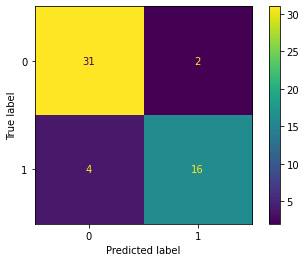

In [17]:
plot_confusion_matrix(model, X_test, y_test)

### Interpret Coefficients

In [18]:
coefficients = np.hstack((model.intercept_, model.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-1.803392
1,cp_1,-0.637319
2,cp_2,-1.729154
3,cp_3,-0.081819
4,cp_4,0.644901
5,exang,0.765462
6,fbs,1.835812
7,restecg_1.0,-0.233674
8,restecg_2.0,-1.128939
9,sex,1.299046


## Selecting Specific Features to Predict Heart Attack

### Select Features

In [19]:
numeric_cols2 = ['chol','oldpeak'] # remove 'age', 'trestbps', 'thalach',
cat_cols2 = ['cp_4','fbs']
cat_cols2.sort()

print(numeric_cols2)
print(cat_cols2)

['chol', 'oldpeak']
['cp_4', 'fbs']


chol: serum cholesterol in mg/dl  
oldpeak: ST depression induced by exercise relative to rest  
cp_4: asymptomatic chest pain type  
fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  

In [20]:
random_seed = 42 
df_train2, df_test2 = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])

print(df_train2.shape)
print(df_test2.shape)
print()
print(df_train2['target'].value_counts(normalize=True))
print()
print(df_test2['target'].value_counts(normalize=True))

(208, 15)
(53, 15)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


### Scale Numerical Values

In [21]:
# calculate the mean and std for scaling using df_train’s numeric_cols.
scaler2 = StandardScaler()
scaler2.fit(df_train2[numeric_cols2])

X2, y2 = get_features_and_target(df_train2, numeric_cols2, cat_cols2, scaler2)

### Build Logistic Regression Model

In [22]:
model2 = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.
model2.fit(X2, y2)

X_test2, y_test2 = get_features_and_target(df_test2, numeric_cols2, cat_cols2, scaler2)

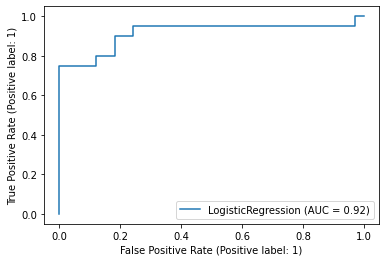

In [23]:
plot_roc_curve(model2, X_test2, y_test2)

In [24]:
test_prob2 = model2.predict_proba(X_test2)[:,1] # Predicted probability of the logistic regression for each class
test_pred2 = model2.predict(X_test2)

In [25]:
model2.score(X_test2, y_test2)

0.8867924528301887

In [26]:
print('Log Loss = {:.4f}'.format(log_loss(y_test2, test_prob2))) # lower log loss value means better predictions.
print('AUC = {:.4f}'.format(roc_auc_score(y_test2, test_prob2))) # Area Under the Curve

print('\nUsing 0.5 as threshold:') # Default value
print('Accuracy = {:.4f}'.format(accuracy_score(y_test2, test_pred2)))
print('Precision = {:.4f}'.format(precision_score(y_test2, test_pred2)))
print('Recall = {:.4f}'.format(recall_score(y_test2, test_pred2)))
print('F1 Score = {:.4f}'.format(f1_score(y_test2, test_pred2))) # the higher the better

print('\nClassification Report')
print(classification_report(y_test2, test_pred2))

Log Loss = 0.3001
AUC = 0.9152

Using 0.5 as threshold:
Accuracy = 0.8868
Precision = 0.9375
Recall = 0.7500
F1 Score = 0.8333

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.75      0.83        20

    accuracy                           0.89        53
   macro avg       0.90      0.86      0.87        53
weighted avg       0.89      0.89      0.88        53



### Plot Confusion Matrix

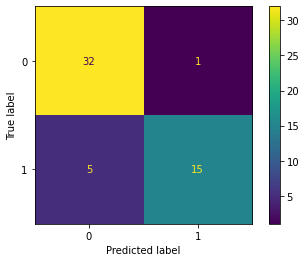

In [27]:
plot_confusion_matrix(model2, X_test2, y_test2)

### Interpret Coefficients

In [28]:
coefficients2 = np.hstack((model2.intercept_, model2.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols2 + numeric_cols2, 'coefficient': coefficients2})

,variable,coefficient
0,intercept,-1.630415
1,cp_4,1.863354
2,fbs,2.011749
3,chol,0.297033
4,oldpeak,1.138560
